In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
G = np.load("greedy.npz")
B = np.load("base.npz")
C = np.load("bc.npz")
I = np.load("inter.npz")
A = np.load("active.npz")

In [14]:
gr = G['REWARD']
gs = G['STEP']
cr = C['REWARD']
cs = C['STEP']
br = B['BREWARD']
bs = B['BSTEP']
ir = I['REWARD']
iS = I['STEP']
ar = A['REWARD']
aS = A['STEP']

In [15]:
print br[0].shape

(8528,)


In [16]:
mgs = -1
sgs = 0
for i in range(gr.shape[0]):
    mgs = max(gr[i].shape[0], mgs)
    sgs += gr[i].shape[0]
print mgs, sgs/gr.shape[0]
mgs = int(sgs/gr.shape[0])

9576 7789


In [17]:
mbs = -1
sbs = 0
for i in range(br.shape[0]):
    mbs = max(br[i].shape[0], mbs)
    sbs += br[i].shape[0]
print mbs, sbs/br.shape[0]
mbs = int(sbs/br.shape[0])

14045 8098


In [18]:
mcs = -1
scs = 0
for i in range(cr.shape[0]):
    mcs = max(cr[i].shape[0], mcs)
    scs += cr[i].shape[0]
print mcs, scs/cr.shape[0]
mcs = int(scs/cr.shape[0])

7953 5318


In [19]:
mis = -1
sis = 0
for i in range(ir.shape[0]):
    mis = max(ir[i].shape[0], mis)
    sis += ir[i].shape[0]
print mis, sis/ir.shape[0]
mis = int(sis/ir.shape[0])

14809 11105


In [20]:
mas = -1
sas = 0
for i in range(ar.shape[0]):
    mas = max(ar[i].shape[0], mas)
    sas += ar[i].shape[0]
print mas, sas/ar.shape[0]
mas = int(sas/ar.shape[0])

7788 6298


In [21]:
gstd = np.array([])
gav = np.array([])
for i in range(mgs):
    a = np.array([])
    for j in range(gr.shape[0]):
        if(gr[j].shape[0] > i):
            a = np.append(a, gr[j][i])
    std = np.std(a)
    av = np.mean(a)
    gstd = np.append(gstd, std)
    gav = np.append(gav, av)

In [22]:
bstd = np.array([])
bav = np.array([])
for i in range(mbs):
    a = np.array([])
    for j in range(br.shape[0]):
        if(br[j].shape[0] > i):
            a = np.append(a, br[j][i])
    std = np.std(a)
    av = np.mean(a)
    bstd = np.append(bstd, std)
    bav = np.append(bav, av)

In [23]:
cstd = np.array([])
cav = np.array([])
for i in range(mcs):
    a = np.array([])
    for j in range(cr.shape[0]):
        if(cr[j].shape[0] > i):
            a = np.append(a, cr[j][i])
    std = np.std(a)
    av = np.mean(a)
    cstd = np.append(cstd, std)
    cav = np.append(cav, av)

In [24]:
istd = np.array([])
iav = np.array([])
for i in range(mis):
    a = np.array([])
    for j in range(ir.shape[0]):
        if(ir[j].shape[0] > i):
            a = np.append(a, ir[j][i])
    std = np.std(a)
    av = np.mean(a)
    istd = np.append(istd, std)
    iav = np.append(iav, av)

In [25]:
astd = np.array([])
aav = np.array([])
for i in range(mas):
    a = np.array([])
    for j in range(ar.shape[0]):
        if(ar[j].shape[0] > i):
            a = np.append(a, ar[j][i])
    std = np.std(a)
    av = np.mean(a)
    astd = np.append(astd, std)
    aav = np.append(aav, av)

In [26]:
# print gstd
# print gav
x = np.linspace(0, mgs, mgs)
y = np.linspace(0, mbs, mbs)
z = np.linspace(0, mcs, mcs)
w = np.linspace(0, mis, mis)
v = np.linspace(0, mas, mas)
# print x

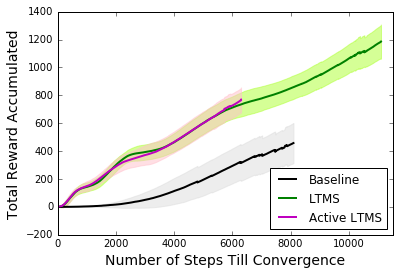

In [32]:
alpha = 0.5
plt.plot(bav, linewidth = 2, color = "black", label = "Baseline")
plt.fill_between(y, bav-bstd, bav+bstd, color = "gainsboro", alpha = alpha)

# plt.plot(gav, linewidth = 2, color = "brown", label = "RMGS")
# plt.fill_between(x, gav-gstd, gav+gstd, color = "salmon", alpha=alpha)

plt.plot(iav, linewidth = 2, color = "green", label = "LTMS")
plt.fill_between(w, iav-istd, iav+istd, color = "greenyellow",alpha=alpha)

# plt.plot(cav, linewidth = 2, color = "darkblue", label = "BCS")
# plt.fill_between(z, cav-cstd, cav+cstd, color = "lightskyblue", alpha = alpha)

plt.plot(aav, linewidth = 2, color = "m", label = "Active LTMS")
plt.fill_between(v, aav-astd, aav+astd, color = "pink", alpha = alpha)

plt.legend(loc=4)
plt.axis([0, 11500, -200, 1400])
plt.ylabel("Total Reward Accumulated", fontsize=14)
plt.xlabel("Number of Steps Till Convergence", fontsize=14)
plt.show()

#### 